In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # Set seed for reproducibility

In [32]:
df = pd.read_csv('diabetes.csv')

In [33]:
# Take a random sample of 25 observations
sample_df = df.sample(n=25, random_state=42)

In [34]:
# Sample statistics
sample_mean = sample_df['Glucose'].mean()
sample_max = sample_df['Glucose'].max()

# Population statistics
pop_mean = df['Glucose'].mean()
pop_max = df['Glucose'].max()

print("Sample Mean:", sample_mean)
print("Sample Max:", sample_max)
print("Population Mean:", pop_mean)
print("Population Max:", pop_max)

Sample Mean: 116.64
Sample Max: 183
Population Mean: 120.89453125
Population Max: 199


The mean glucose level of the sample closely estimates the population's mean. Though the maximum glucose level of the sample population is not a close estimate as the mean glucose level, it is still a sensible estimate. So, the current sample explains the mean and maximum values in the dataset well.

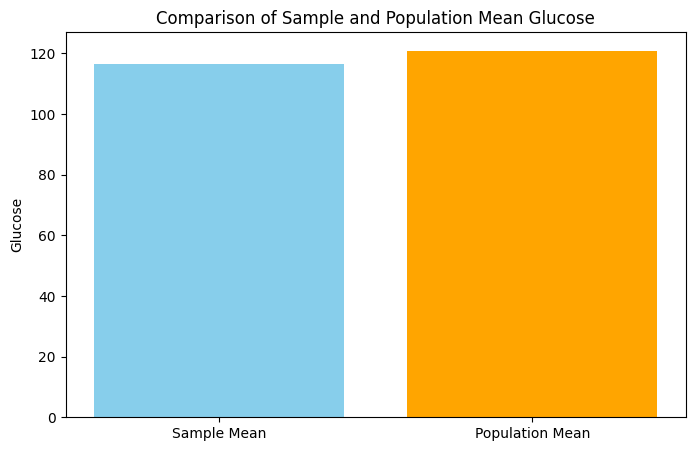

<Figure size 640x480 with 0 Axes>

In [35]:
# Plot comparison
plt.figure(figsize=(8,5))
plt.bar(['Sample Mean', 'Population Mean'], [sample_mean, pop_mean], color=['skyblue', 'orange'])
plt.title('Comparison of Sample and Population Mean Glucose')
plt.ylabel('Glucose')

plt.show()
plt.savefig('Comparisonofmeanglucose.jpg', dpi=300, bbox_inches='tight')


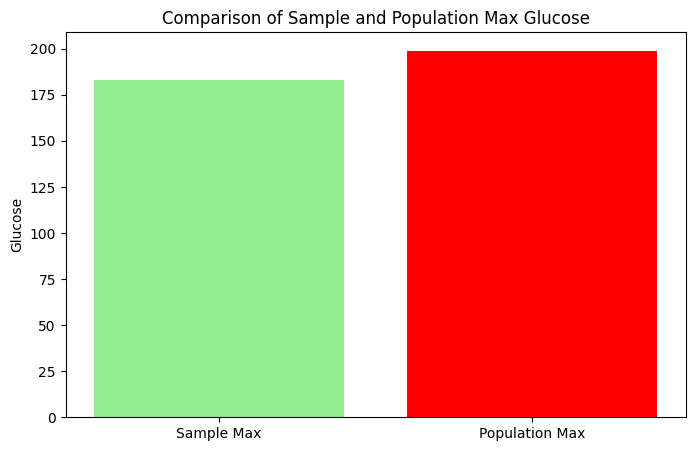

<Figure size 640x480 with 0 Axes>

In [36]:
plt.figure(figsize=(8,5))
plt.bar(['Sample Max', 'Population Max'], [sample_max, pop_max], color=['lightgreen', 'red'])
plt.title('Comparison of Sample and Population Max Glucose')
plt.ylabel('Glucose')

plt.show()
plt.savefig('Comparisonofmaxglucose.jpg', dpi=300, bbox_inches='tight')

Sample 98th Percentile BMI: 40.248
Population 98th Percentile BMI: 47.52599999999996


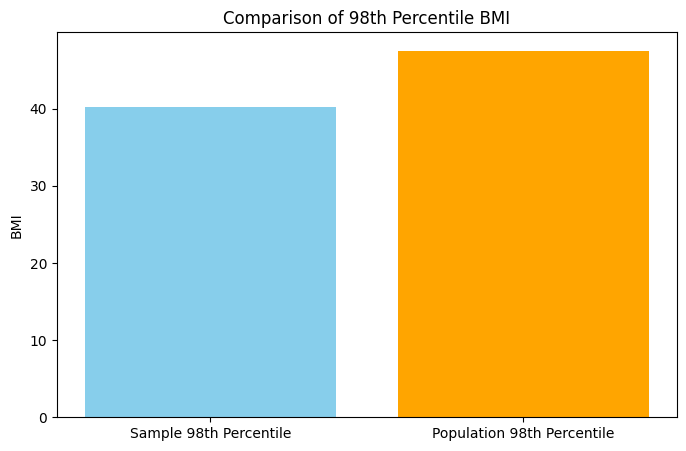

<Figure size 640x480 with 0 Axes>

In [37]:
# 98th percentile of BMI
sample_98th = np.percentile(sample_df['BMI'], 98)
pop_98th = np.percentile(df['BMI'], 98)

print("Sample 98th Percentile BMI:", sample_98th)
print("Population 98th Percentile BMI:", pop_98th)

# Plot comparison
plt.figure(figsize=(8,5))
plt.bar(['Sample 98th Percentile', 'Population 98th Percentile'], [sample_98th, pop_98th], color=['skyblue', 'orange'])
plt.title('Comparison of 98th Percentile BMI')
plt.ylabel('BMI')
plt.show()
plt.savefig('Comparisonof98thBMI.jpg', dpi=300, bbox_inches='tight')

The samples 98th percentile BMI is 40 apprx whereas the population's 98th percentile is 47. If we are dealing with a problem which has a significant weightage for outlying values, this sample cannot be considered a good estimate. The dataset should be sampled more times and an average should be taken for the 98th percentile.

In [38]:
# Parameters
n_bootstrap = 500
sample_size = 150

# Store bootstrap statistics
bootstrap_means = []
bootstrap_stds = []
bootstrap_98th = []

# Bootstrap sampling
for _ in range(n_bootstrap):
    sample = df['BloodPressure'].sample(n=sample_size, replace=True)
    bootstrap_means.append(sample.mean())
    bootstrap_stds.append(sample.std())
    bootstrap_98th.append(np.percentile(sample, 98))

# Convert to numpy arrays
bootstrap_means = np.array(bootstrap_means)
bootstrap_stds = np.array(bootstrap_stds)
bootstrap_98th = np.array(bootstrap_98th)

# Bootstrap statistics
mean_of_means = bootstrap_means.mean()
mean_of_stds = bootstrap_stds.mean()
mean_of_98th = bootstrap_98th.mean()

# Population statistics
pop_mean = df['BloodPressure'].mean()
pop_std = df['BloodPressure'].std()
pop_98th = np.percentile(df['BloodPressure'], 98)

print("Bootstrap Mean of Means:", mean_of_means)
print("Bootstrap Mean of STDs:", mean_of_stds)
print("Bootstrap Mean of 98th Percentile:", mean_of_98th)
print("Population Mean:", pop_mean)
print("Population STD:", pop_std)
print("Population 98th Percentile:", pop_98th)

Bootstrap Mean of Means: 69.17692000000001
Bootstrap Mean of STDs: 19.073717755676082
Bootstrap Mean of 98th Percentile: 97.90244000000003
Population Mean: 69.10546875
Population STD: 19.355807170644777
Population 98th Percentile: 99.31999999999994


The bootstrapping results of the mean, standard deviation and 98th percentile of Blood pressure is almost an exact estimate of the corresponding population values. This shows how sampling can be leveraged via bootrstrapping to give an nearly accurate estimate of original values when we have limited resources to analyze data.

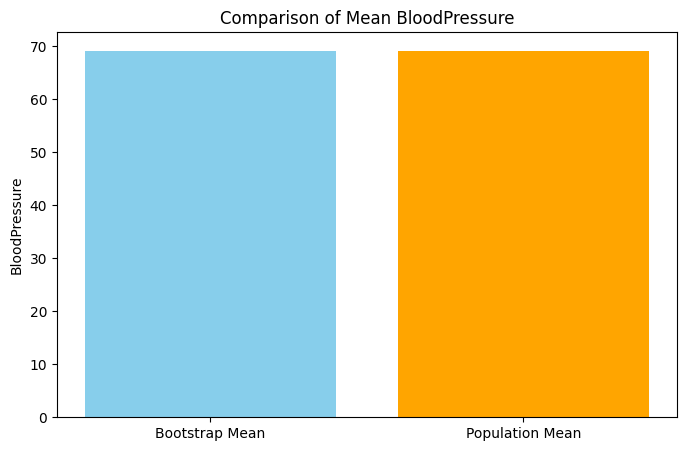

<Figure size 640x480 with 0 Axes>

In [39]:
# Plot comparison - Mean
plt.figure(figsize=(8,5))
plt.bar(['Bootstrap Mean', 'Population Mean'], [mean_of_means, pop_mean], color=['skyblue', 'orange'])
plt.ylabel('BloodPressure')
plt.title('Comparison of Mean BloodPressure')
plt.show()
plt.savefig('BootstrapComparisonofMeanBloodPressure.jpg', dpi=300, bbox_inches='tight')

The bootstrapped mean is almost a precise estimate of the population mean

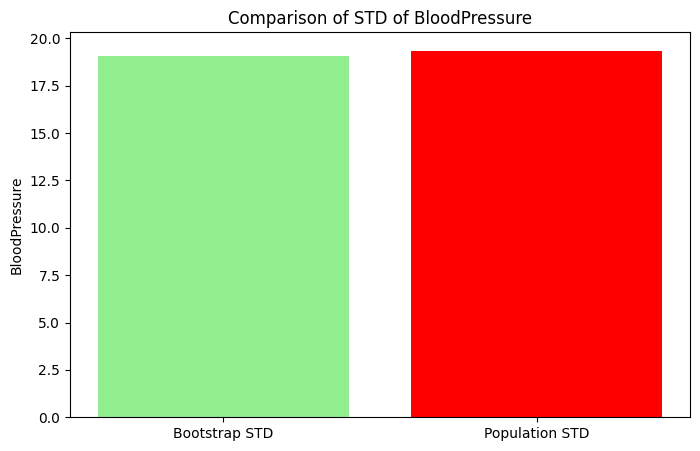

<Figure size 640x480 with 0 Axes>

In [40]:
# Plot comparison - STD
plt.figure(figsize=(8,5))
plt.bar(['Bootstrap STD', 'Population STD'], [mean_of_stds, pop_std], color=['lightgreen', 'red'])
plt.ylabel('BloodPressure')
plt.title('Comparison of STD of BloodPressure')
plt.show()
plt.savefig('BootstrapComparisonofstdBloodPressure.jpg', dpi=300, bbox_inches='tight')

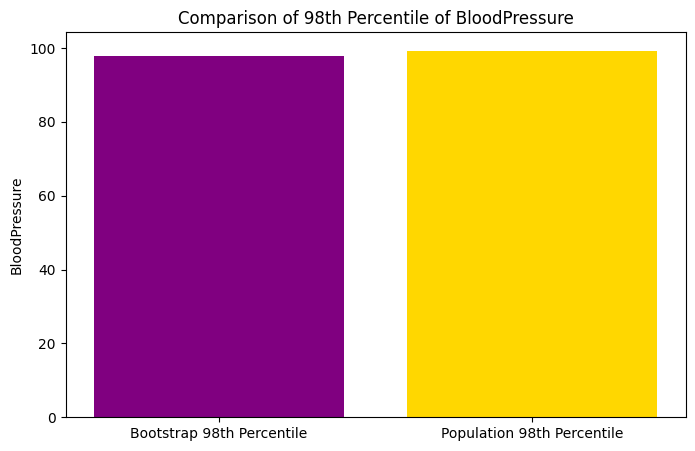

<Figure size 640x480 with 0 Axes>

In [41]:

# Plot comparison - 98th percentile
plt.figure(figsize=(8,5))
plt.bar(['Bootstrap 98th Percentile', 'Population 98th Percentile'], [mean_of_98th, pop_98th], color=['purple', 'gold'])
plt.ylabel('BloodPressure')
plt.title('Comparison of 98th Percentile of BloodPressure')
plt.show()

plt.savefig('BootstrapComparisonof98thBloodPressure.jpg', dpi=300, bbox_inches='tight')